In this experiment, we want to show the difference between the RGB and spatial normalization. We will define two functions, named RGB_norm and spatial_norm. The former normalizes the data over three different color channels, while the latter do this over the same color space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from cs231n.data_utils import get_CIFAR10_data
data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)
# get the 10 pics
image10 = data['X_train'][:10]
print(image10.shape)

X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)
(10, 3, 32, 32)


TypeError: Invalid dimensions for image data

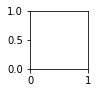

In [4]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image10[i].astype('uint8'))
    plt.axis('off')
    plt.title(i)

In [41]:
# definition of RGB_norm
def RGB_norm(x):
    """
    compute the mean and variance along the colors
    
    Input:
    - x: input data of shape (N, C, H, W)
    Return:
    - out: output data of shape (N, C, H, W) 
    x(N, C, H, W)->x_hat(N*C, H*W )->mean(1, H*W), var(1, H*W)
    (x_hat-mean)/var
    """
    N, C, H, W = x.shape
    x_hat = x.reshape(-1, H*W)
    mean = np.mean(x_hat, axis=0)
    var = np.var(x_hat, axis=0)
    out = (x_hat - mean) * var**(-0.5)
    return out.reshape(N, C, H, W).transpose(0,2,3,1)

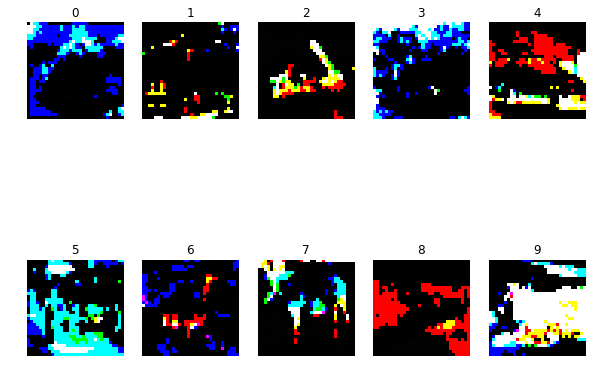

In [43]:
x_rgb_norm = RGB_norm(image10)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_rgb_norm[i].astype('uint8'))
    plt.axis('off')
    plt.title(i)
    


In [44]:
# definition of spatial_norm
def spatial_norm(x):
    """
    compute the mean and var over the same color space
    Input:
    - x: input data of shape (N, C, H, W)
    Return:
    - out: output data of shape (N, C, H, W) 
    x(N, C, H, W)->x_hat(N*H*W, C)->mean(1, C), var(1, C)
    (x_hat-mean)/var
    """
    N, C, H, W = x.shape
    x_hat = x.transpose(0,2,3,1).reshape(-1, C)
    mean = np.mean(x_hat, axis=0)
    var = np.var(x_hat, axis=0)
    out = (x_hat - mean) * var**(-0.5)
    return out.reshape(N, H, W, C)

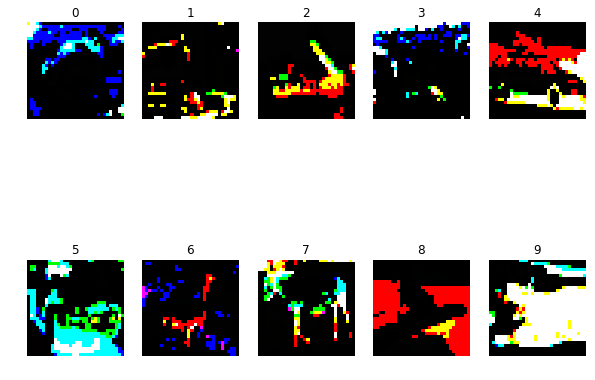

In [45]:
x_spa_norm = spatial_norm(image10)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_spa_norm[i].astype('uint8'))
    plt.axis('off')
    plt.title(i)